## Gameplay logs and data analysis

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [3]:
i = 0
df = pd.DataFrame()

for filename in glob.glob('./logs/*.txt'):
    with open(filename, 'r') as f:
        text = f.read()
        if "ended" in text:
            # Get number of teleports
            tps = text.count('TELEPORT')/2
            
            # Get number of errors.
            lines = text.split('\n')
            line = lines[-3].split(' ')
            errors = int(line[-1])
            
            # Get score
            line = lines[-4].split(' ')
            score = int(line[-1]) + 50*errors
            dic = [filename,score,errors,tps]
            
            if tps < 5:
                continue
            
            # Add to Dataframe
            dfaux = pd.DataFrame([dic],columns=['name','score','errors','tps'])
            df = df.append(dfaux, ignore_index=True)
            i += 1
            
print("Total finished gameplays", i)

Total finished gameplays 177


In [10]:
X = df[['score','tps']].as_matrix()
#for i in range(2):
#    X[:,i] /= max(X[:,i])

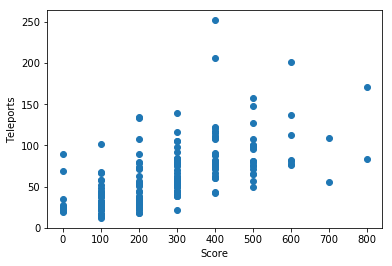

In [11]:
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Score")
plt.ylabel("Teleports")
plt.show()

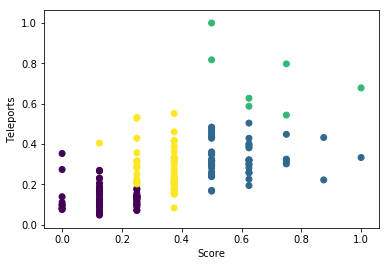

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
plt.xlabel("Score")
plt.ylabel("Teleports")
C = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.show()

In [52]:
X = df[['score','tps','errors']].as_matrix()
values = ['score','tps','errors']
for i in range(3):
    mx = max(X[:,i])
    print ("Max " + values[i] + " is " + str(mx))
    X[:,i] /= mx

Max score is 800.0
Max tps is 252.0
Max errors is 4.0


<IPython.core.display.Javascript object>


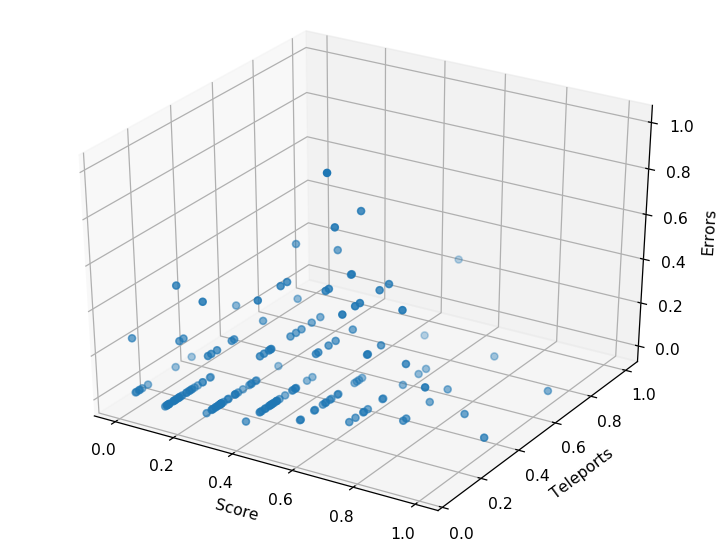

In [53]:
%matplotlib notebook

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Score')
ax.set_ylabel('Teleports')
ax.set_zlabel('Errors')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [55]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

<IPython.core.display.Javascript object>


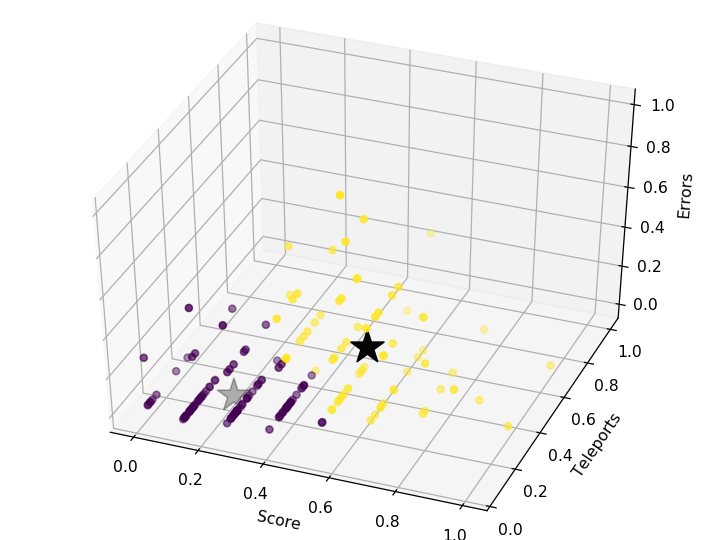

In [56]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = labels)
ax.set_xlabel('Score')
ax.set_ylabel('Teleports')
ax.set_zlabel('Errors')
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=500)

<IPython.core.display.Javascript object>


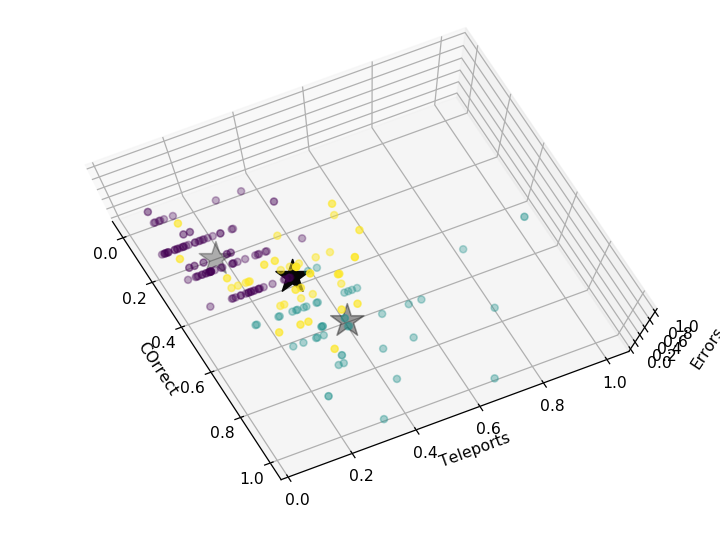

In [58]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = labels)
ax.set_xlabel('COrrect')
ax.set_ylabel('Teleports')
ax.set_zlabel('Errors')
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=500)

<IPython.core.display.Javascript object>


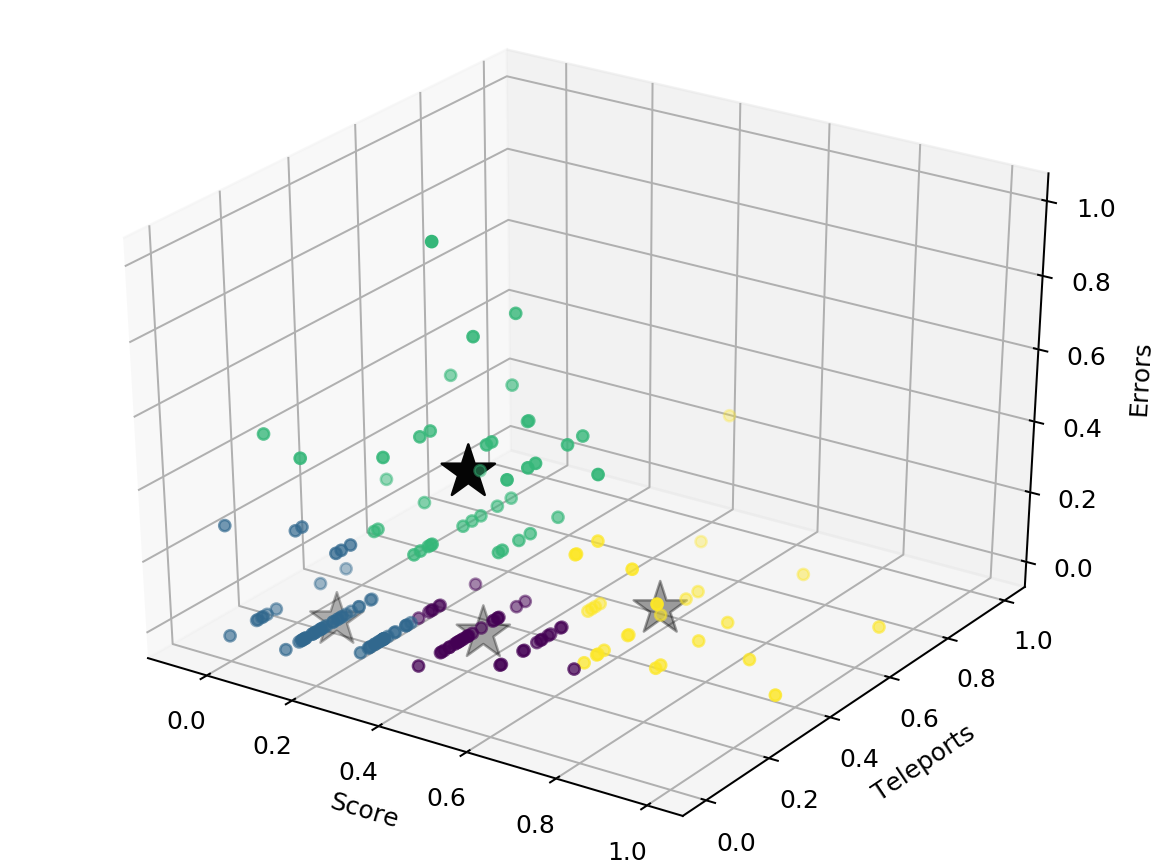

In [21]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = labels)
ax.set_xlabel('Score')
ax.set_ylabel('Teleports')
ax.set_zlabel('Errors')
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=500)

<IPython.core.display.Javascript object>


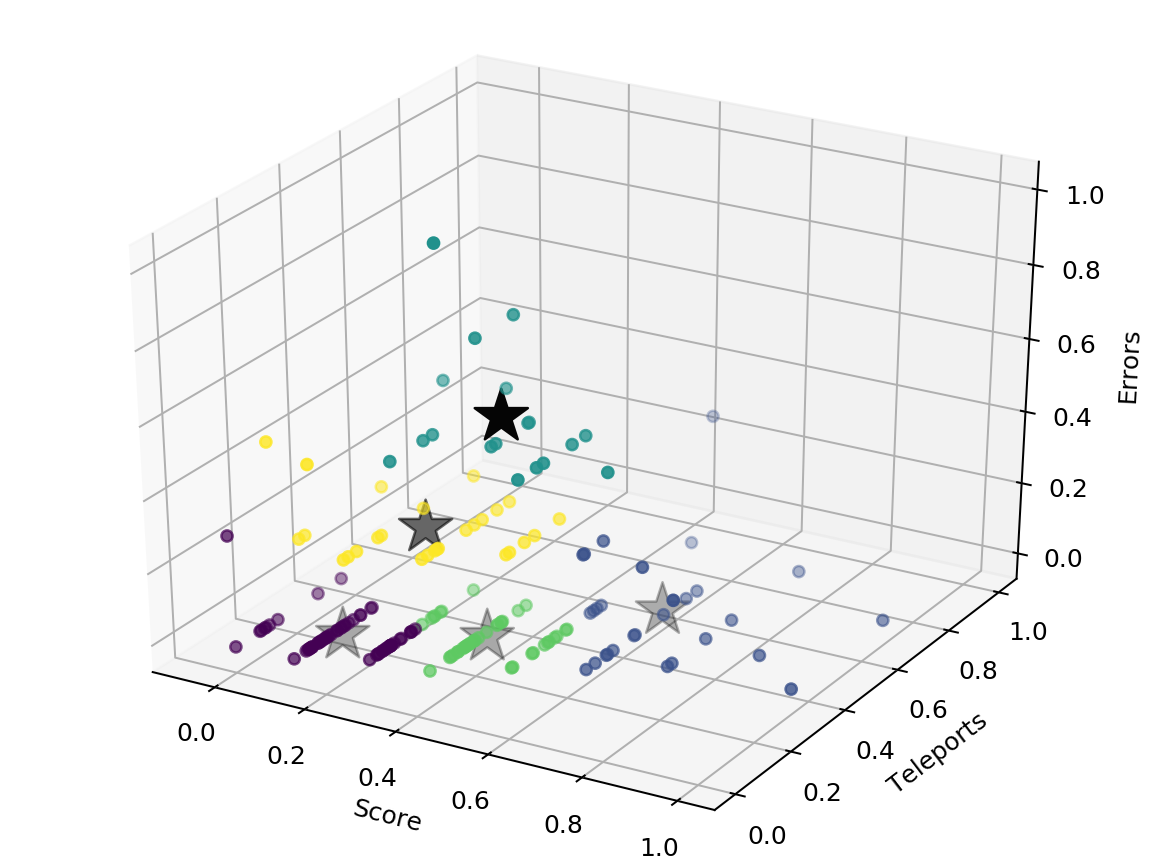

In [12]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = labels)
ax.set_xlabel('Score')
ax.set_ylabel('Teleports')
ax.set_zlabel('Errors')
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=500)